General imports made to make the code function

In [1]:
# Used imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Preparing dataframes**
Prepare every data category induvidually

Reading all the csv's into dataframes

In [2]:
df_deelnemeners = pd.read_csv('Data - Zuivere dataset/HealthyLIFE_datadump_03-2023_1.csv', sep=';')
df_fitheids_scan = pd.read_csv('Data - Zuivere dataset/HealthyLIFE_datadump_03-2023_2.csv', sep=';')

**Verwijderen onbruikbare data**

Bewerken van de df_deelnemers dataset uit de aangeleverde set data van Roel

In [3]:
df_deelnemeners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426 entries, 0 to 2425
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               2426 non-null   int64 
 1   Geslacht         2426 non-null   object
 2   Woonplaats       2426 non-null   object
 3   Postcode         1702 non-null   object
 4   Beweegcoach1     1609 non-null   object
 5   Leefstijlcoach1  2214 non-null   object
 6   age              2426 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 132.8+ KB


In [4]:
# Rename columns
df_deelnemeners.rename(columns={'Id': 'DeelnemerID'}, inplace=True)

# Adding columns
df_deelnemeners['Gemeente'] = df_deelnemeners['Woonplaats']

# Replace values
df_deelnemeners['Gemeente'] = df_deelnemeners['Gemeente'].replace(['Born', 'Geleen', 'Sittard'], 'Sittard-Geleen')
df_deelnemeners['Gemeente'] = df_deelnemeners['Gemeente'].replace(['Schinnen'], 'Beekdaelen')

# Dropping row with specific testing value
df_deelnemeners.drop(df_deelnemeners[df_deelnemeners['Gemeente'] == 'Test'].index, inplace = True)

# Dropping columns
df_deelnemeners.drop(columns=['Woonplaats', 'Postcode'], inplace = True)

# Dit is een beetje experimenteel maar hier drop ik gewoon waardeloze data die we niet nodig hebben -groetjes Justin XOXOXO
df_deelnemeners.drop(columns={'Beweegcoach1', 'Leefstijlcoach1'}, inplace= True)
# Ook doe ik even hier de deelnemerID naar int omzetten omdat er geen halve deelnemen kan zijn... denk ik
df_deelnemeners['DeelnemerID'] = df_deelnemeners['DeelnemerID'].astype(int)

# Display the modified DataFrame
df_deelnemeners

,DeelnemerID,Geslacht,age,Gemeente
0,1,V,51,Sittard-Geleen
1,2,V,45,Sittard-Geleen
2,3,V,68,Sittard-Geleen
3,4,M,64,Sittard-Geleen
4,5,V,63,Sittard-Geleen
...,...,...,...,...
2421,2661,V,47,Beekdaelen
2422,2662,V,29,Sittard-Geleen
2423,2663,V,66,Maasgouw
2424,2664,M,52,Maasgouw


Bewerken van de df_fitheids_scan dataset

In [5]:
df_fitheids_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DeelnemerID  3193 non-null   float64
 1   Datum        3197 non-null   object 
 2   Lengte       3195 non-null   object 
 3   Gewicht      3178 non-null   object 
 4   6 MWT        3120 non-null   object 
 5   TUG          3130 non-null   object 
 6   BMI          3196 non-null   object 
 7   Conditie     3197 non-null   object 
 8   Lenigheid    3006 non-null   object 
 9   Knijpkracht  3197 non-null   object 
 10  #meting      3197 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 274.9+ KB


In [6]:
# Convert 'DeelnemerID' column to int
df_fitheids_scan['DeelnemerID'] = df_fitheids_scan['DeelnemerID'].astype(pd.Int64Dtype())

# Replace commas with periods and convert columns to float
columns_to_convert = ['Lengte', 'Gewicht', '6 MWT', 'TUG', 'BMI', 'Conditie', 'Lenigheid', 'Knijpkracht']
df_fitheids_scan[columns_to_convert] = df_fitheids_scan[
    columns_to_convert].astype(str).apply(lambda x: x.str.replace(',', '.')).astype(float)

df_fitheids_scan['Datum'] = pd.to_datetime(df_fitheids_scan['Datum'])

# Display the modified DataFrame
df_fitheids_scan

C:\Users\Vincent\AppData\Local\Temp\ipykernel_18488\2775220850.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fitheids_scan['Datum'] = pd.to_datetime(df_fitheids_scan['Datum'])


,DeelnemerID,Datum,Lengte,Gewicht,6 MWT,TUG,BMI,Conditie,Lenigheid,Knijpkracht,#meting
0,1,2018-03-30,159.0,97.6,500.0,6.36,38.606068,0.820291,31.50,15.0,1
1,1,2018-06-18,159.0,95.3,448.0,9.30,37.700000,0.695091,0.00,45.8,2
2,2,2018-03-30,175.0,89.1,596.0,5.82,29.093878,0.806495,27.00,34.0,1
3,2,2019-01-25,170.0,86.0,556.0,5.50,29.757785,0.779192,29.25,29.0,3
4,3,2018-07-02,151.5,94.8,512.0,6.84,41.303140,1.054387,19.00,20.3,2
...,...,...,...,...,...,...,...,...,...,...,...
3192,2409,2023-03-07,182.0,130.0,543.5,6.00,39.246468,0.834113,NaN,45.6,1
3193,2341,2023-03-07,184.5,139.2,558.0,6.20,40.892767,0.766821,14.50,84.7,2
3194,2340,2023-03-07,158.6,107.4,486.0,7.00,42.697054,0.788393,486.00,33.7,2
3195,2337,2023-03-07,175.5,111.0,557.0,6.40,36.038669,0.820348,25.50,68.2,2


Identify NaN values

In [7]:
nan_counts = df_fitheids_scan.isna().sum()
print(nan_counts)

DeelnemerID      4
Datum            0
Lengte           2
Gewicht         19
6 MWT           77
TUG             67
BMI              1
Conditie         0
Lenigheid      191
Knijpkracht      0
#meting          0
dtype: int64


<Axes: >

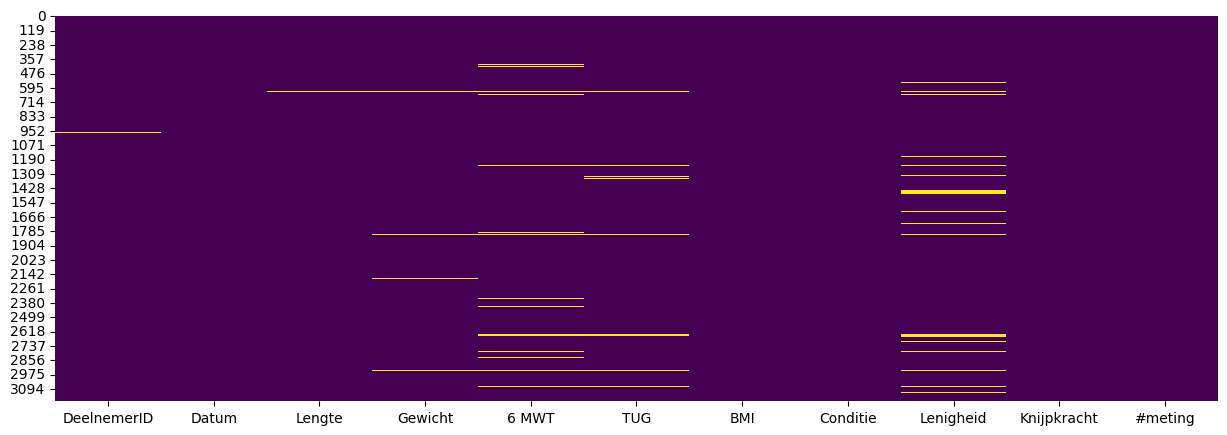

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_fitheids_scan.isnull(),cbar=False,cmap='viridis')

Identify outliers

In [9]:
import plotly.express as px

# Remove rows with a BMI higher then 50 since this messes the plot
df_fitheids_scan = df_fitheids_scan[df_fitheids_scan['BMI'] <= 50]

# Create box plots for each column
fig = px.box(df_fitheids_scan, y=['Lengte', 'Gewicht', '6 MWT', 'TUG', 'BMI', 'Conditie', 'Lenigheid', 'Knijpkracht'], facet_col_wrap=4)

# Update the layout and show the figure
fig.update_layout(height=600, width=800, title_text="Box Plots")
fig.show()

Remove outliers

*The outlier value will be set to NaN, so this target variable can be dropped later. This because the other values in this data may be usefull*

In [10]:
import numpy as np

df_fitheids_scan.loc[~((df_fitheids_scan['Lengte'] >= 145) & (df_fitheids_scan['Lengte'] <= 194)), 'Lengte'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['Gewicht'] >= 58.8) & (df_fitheids_scan['Gewicht'] <= 144.6)), 'Gewicht'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['6 MWT'] >= 260) & (df_fitheids_scan['6 MWT'] <= 740)), '6 MWT'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['TUG'] >= 2.6) & (df_fitheids_scan['TUG'] <= 10)), 'TUG'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['BMI'] >= 21.23085) & (df_fitheids_scan['BMI'] <= 48.45679)), 'BMI'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['Conditie'] >= 0.4148571) & (df_fitheids_scan['Conditie'] <= 1.198494)), 'Conditie'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['Lenigheid'] >= 0) & (df_fitheids_scan['Lenigheid'] <= 45)), 'Lenigheid'] = np.nan
df_fitheids_scan.loc[~((df_fitheids_scan['Knijpkracht'] >= 6.5) & (df_fitheids_scan['Knijpkracht'] <= 63.2)), 'Knijpkracht'] = np.nan

In [11]:
nan_counts = df_fitheids_scan.isna().sum()
print(nan_counts)

DeelnemerID      4
Datum            0
Lengte          15
Gewicht         65
6 MWT          175
TUG            193
BMI             52
Conditie       152
Lenigheid      195
Knijpkracht    140
#meting          0
dtype: int64


<Axes: >

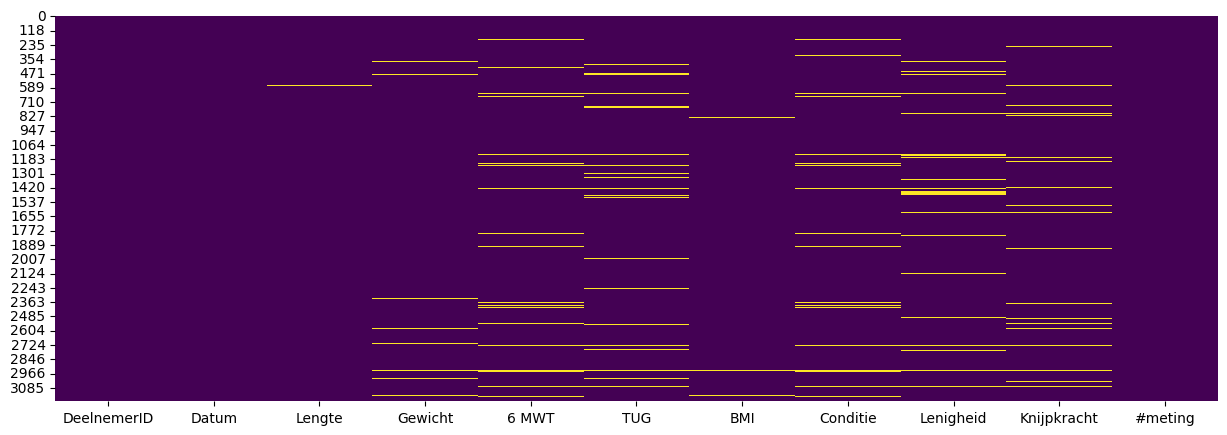

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_fitheids_scan.isnull(),cbar=False,cmap='viridis')

Identify incorrect data

In [13]:
# Checking for wrong entries like symbols -,?,#,*,etc.
for col in df_fitheids_scan.columns:
    try:
        print('{} : {}'.format(col,df_fitheids_scan[col].unique()))
    except:
        print(col)

DeelnemerID : <IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   14,
 ...
 2426, 2225, 2416, 2411, 2417, 2412, 2408, 2223, 2407, 2409]
Length: 1726, dtype: Int64
Datum : <DatetimeArray>
['2018-03-30 00:00:00', '2018-06-18 00:00:00', '2019-01-25 00:00:00',
 '2018-07-02 00:00:00', '2018-11-29 00:00:00', '2018-07-11 00:00:00',
 '2018-10-22 00:00:00', '2018-04-03 00:00:00', '2018-07-09 00:00:00',
 '2018-04-04 00:00:00',
 ...
 '2023-02-20 00:00:00', '2023-02-21 00:00:00', '2023-02-23 00:00:00',
 '2023-02-26 00:00:00', '2023-02-27 00:00:00', '2023-02-28 00:00:00',
 '2023-03-01 00:00:00', '2023-03-02 00:00:00', '2023-03-06 00:00:00',
 '2023-03-07 00:00:00']
Length: 321, dtype: datetime64[ns]
Lengte : [159.  175.  170.  151.5 168.  169.  158.  162.  160.5 152.5 152.  153.
 155.  155.1 156.5 156.  177.  167.  167.5 185.5 158.5 170.5 154.  160.4
 166.5 173.  163.  163.5 164.5 164.  165.  181.5 186.5 174.  180.  180.5
 174.7 174.5 170.3 176.  178.  165.5 164.6 148.5 160.  175

Drop incorrect data

In [14]:
df_fitheids_scan = df_fitheids_scan[(df_fitheids_scan['DeelnemerID'] != '<NA>')]

Measure differences beween

In [15]:
# Sorteer het dataframe op deelnemers id en sessie id
df_fitheids_scan.sort_values(['DeelnemerID', '#meting'], inplace=True)

# Groepeer de gegevens op deelnemers id en bereken het verschil
for column in ['Lengte', 'Gewicht', '6 MWT', 'TUG', 'BMI', 'Conditie', 'Lenigheid', 'Knijpkracht']:
    df_fitheids_scan['verschil_'+column] = df_fitheids_scan.groupby('DeelnemerID')[column].diff()
    df_fitheids_scan.drop(columns=[column], inplace=True)

# Groepeer de gegevens op deelnemers id en bereken het verschil in dagen voor een datum
df_fitheids_scan['verschil_dagen'] = df_fitheids_scan.groupby('DeelnemerID')['Datum'].diff().dt.days

# Verwijder de rijen waarin het verschil in gewicht NaN is (eerste sessie)
# df_fitheids_scan.dropna(inplace=True)
df_fitheids_scan = df_fitheids_scan[df_fitheids_scan['#meting'] != 1]

df_fitheids_scan

,DeelnemerID,Datum,#meting,verschil_Lengte,verschil_Gewicht,verschil_6 MWT,verschil_TUG,verschil_BMI,verschil_Conditie,verschil_Lenigheid,verschil_Knijpkracht,verschil_dagen
1,1,2018-06-18,2,0.0,-2.3,-52.0,2.94,-0.906068,-0.125200,-31.50,30.8,80.0
3,2,2019-01-25,3,-5.0,-3.1,-40.0,-0.32,0.663908,-0.027304,2.25,-5.0,301.0
4,3,2018-07-02,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,2018-11-29,3,0.0,-7.2,-104.0,-2.43,-3.133140,-0.384503,-4.00,11.5,150.0
7,4,2018-07-11,2,1.0,-4.9,63.0,-1.92,-2.143719,0.080729,7.50,2.7,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3089,2657,2023-03-01,2,0.0,-9.9,5.0,0.40,-3.160011,-0.018652,1.50,5.3,-1.0
3087,2659,2023-03-01,2,0.0,-2.4,64.0,1.00,-0.732578,0.086585,0.00,-1.6,-1.0
3093,2660,2023-03-01,2,0.0,0.0,25.0,-0.50,0.000000,0.048470,1.75,1.5,0.0
3088,2661,2023-03-01,2,0.0,-4.6,45.0,-0.60,-1.710292,0.059816,4.00,2.4,-1.0


<Axes: >

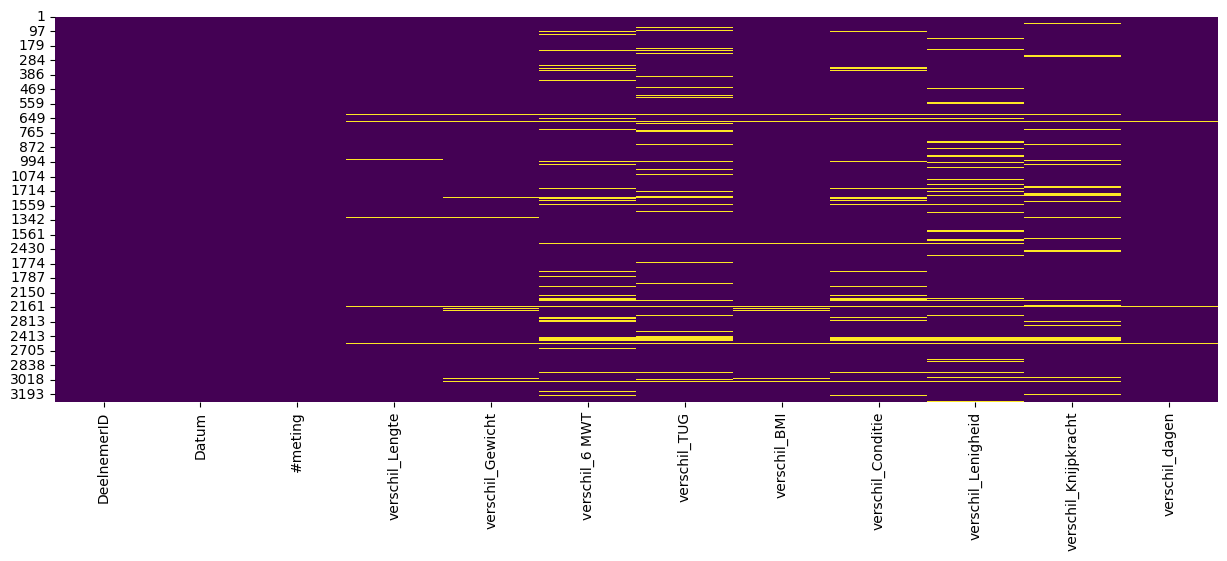

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_fitheids_scan.isnull(),cbar=False,cmap='viridis')

In [17]:
# Rows with more then 8 values missing will be dropped scince they dont have any target vaules left
df_fitheids_scan.dropna(axis=0, thresh=8, subset=None, inplace=True)

<Axes: >

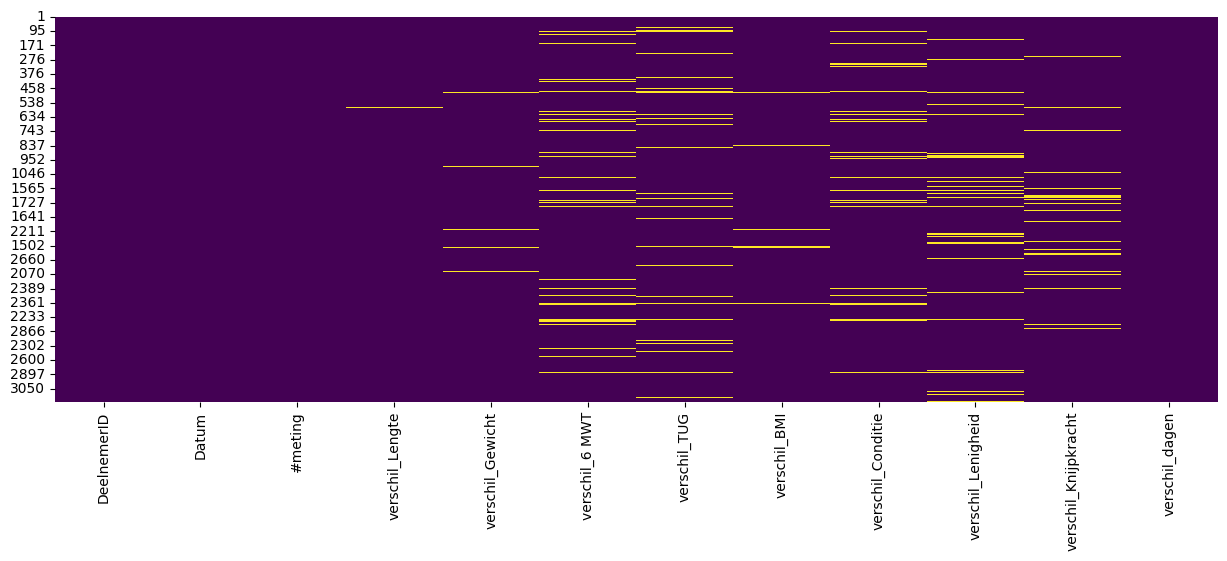

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_fitheids_scan.isnull(),cbar=False,cmap='viridis')

Drop incorrect data

In [19]:
df_fitheids_scan = df_fitheids_scan[(df_fitheids_scan['verschil_dagen'] <= 0)]

Check wierd values like a big difference in lenght

In [20]:
# Checking for incorrect data
for col in df_fitheids_scan.columns:
    try:
        print('{} : {}'.format(col,df_fitheids_scan[col].unique()))
    except:
        print(col)

DeelnemerID : <IntegerArray>
[  43,  100,  218,  220,  225,  258,  271,  288,  293,  294,
 ...
 2601, 2602, 2652, 2655, 2656, 2657, 2659, 2660, 2661, 2665]
Length: 242, dtype: Int64
Datum : <DatetimeArray>
['2019-08-16 00:00:00', '2019-01-28 00:00:00', '2019-02-11 00:00:00',
 '2019-04-02 00:00:00', '2019-06-07 00:00:00', '2021-12-13 00:00:00',
 '2020-02-28 00:00:00', '2019-07-04 00:00:00', '2019-08-26 00:00:00',
 '2020-03-11 00:00:00', '2022-01-07 00:00:00', '2022-04-05 00:00:00',
 '2022-01-10 00:00:00', '2022-01-13 00:00:00', '2022-01-04 00:00:00',
 '2022-01-06 00:00:00', '2022-05-09 00:00:00', '2022-03-31 00:00:00',
 '2022-02-09 00:00:00', '2022-03-28 00:00:00', '2022-03-25 00:00:00',
 '2022-04-28 00:00:00', '2022-04-14 00:00:00', '2022-02-11 00:00:00',
 '2022-07-25 00:00:00', '2022-02-16 00:00:00', '2022-08-23 00:00:00',
 '2022-03-03 00:00:00', '2022-02-28 00:00:00', '2023-02-16 00:00:00',
 '2022-11-30 00:00:00', '2023-01-04 00:00:00', '2023-02-08 00:00:00',
 '2023-02-14 00:00:00', 

**Merging dataframes**

Merge df_deelnemers & df_fitheids_scan en verwijder de losse datasets hierna

In [21]:
# Converting DeelnemerID to INT to merge properly
df_deelnemeners['DeelnemerID'] = df_deelnemeners['DeelnemerID'].astype(pd.Int64Dtype())

# Merge df_deelnemers & df_fitheids_scan
df_healthy_life = pd.merge(df_fitheids_scan, df_deelnemeners, on='DeelnemerID')

# Delete df_deelnemers & df_fitheids_scan for minimalizing the ram usage
del df_fitheids_scan, df_deelnemeners


df_healthy_life.info()

df_healthy_life

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DeelnemerID           263 non-null    Int64         
 1   Datum                 263 non-null    datetime64[ns]
 2   #meting               263 non-null    int64         
 3   verschil_Lengte       263 non-null    float64       
 4   verschil_Gewicht      255 non-null    float64       
 5   verschil_6 MWT        246 non-null    float64       
 6   verschil_TUG          241 non-null    float64       
 7   verschil_BMI          257 non-null    float64       
 8   verschil_Conditie     248 non-null    float64       
 9   verschil_Lenigheid    233 non-null    float64       
 10  verschil_Knijpkracht  251 non-null    float64       
 11  verschil_dagen        263 non-null    float64       
 12  Geslacht              263 non-null    object        
 13  age                 

,DeelnemerID,Datum,#meting,verschil_Lengte,verschil_Gewicht,verschil_6 MWT,verschil_TUG,verschil_BMI,verschil_Conditie,verschil_Lenigheid,verschil_Knijpkracht,verschil_dagen,Geslacht,age,Gemeente
0,43,2019-08-16,2,0.0,-3.9,48.0,-1.13,-1.273469,0.070475,-9.00,9.3,0.0,M,77,Sittard-Geleen
1,100,2019-01-28,2,0.0,0.5,5.0,-1.93,0.168918,0.016733,11.00,-1.2,0.0,V,66,Sittard-Geleen
2,218,2019-02-11,2,0.0,-2.0,NaN,NaN,-0.692042,NaN,2.00,1.5,0.0,V,72,Sittard-Geleen
3,220,2019-02-11,2,0.1,-1.9,NaN,-0.70,-0.660030,NaN,-1.70,3.2,0.0,M,65,Sittard-Geleen
4,225,2019-04-02,2,0.0,-4.0,71.0,0.40,-1.479336,0.133930,25.00,-0.6,0.0,V,78,Sittard-Geleen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2657,2023-03-01,2,0.0,-9.9,5.0,0.40,-3.160011,-0.018652,1.50,5.3,-1.0,V,43,Beekdaelen
259,2659,2023-03-01,2,0.0,-2.4,64.0,1.00,-0.732578,0.086585,0.00,-1.6,-1.0,M,63,Beekdaelen
260,2660,2023-03-01,2,0.0,0.0,25.0,-0.50,0.000000,0.048470,1.75,1.5,0.0,V,64,Beekdaelen
261,2661,2023-03-01,2,0.0,-4.6,45.0,-0.60,-1.710292,0.059816,4.00,2.4,-1.0,V,47,Beekdaelen


Export data

In [22]:
df_healthy_life.drop(columns=['DeelnemerID', '#meting'], inplace=True)

In [23]:
df_healthy_life.to_csv('HealthyLife_prep', index=False)  